In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import seaborn as sns; sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
breast = load_breast_cancer()

In [ ]:
breast_data = breast.data
breast_data.shape

(569, 30)

In [ ]:
breast_input = pd.DataFrame(breast_data)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
breast_labels = breast.target
breast_labels.shape

(569,)

In [ ]:
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

In [ ]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
features_labels = np.append(features,'Type')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
# Commented out due to scatter plot function needing number values
#breast_dataset['Type'].replace(0, 'Benign',inplace=True)
#breast_dataset['Type'].replace(1, 'Malignant',inplace=True)

In [ ]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Type
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [ ]:
# 80% Training split
y = breast_dataset.loc[:,['Type']].values
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
y[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
# Problem 1
# Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). Use 
# the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).

# 1. Identify the optimum number of K, principal components that achieve the highest classification accuracy. 
# 2. Plot your classification accuracy, precision, and recall over a different number of Ks. 
# 3. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare 
#    the accuracies for different kernels.
# 4. Compare your results against the logistic regression that you have done in homework 3.
# Make sure to explain and elaborate your results.

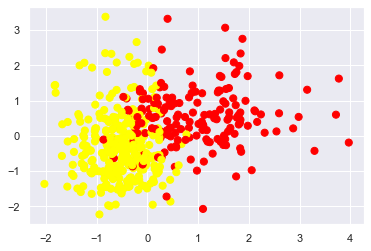

In [ ]:
# Determine how linear datset currently is
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=50, cmap='autumn');

In [ ]:
model = SVC(kernel='linear', C=1E10)
model.fit(X_train, Y_train.ravel())

SVC(C=10000000000.0, kernel='linear')

In [ ]:
# Perform training with K number of prinicipal components
Accuracy = []
Precision_B = []
Recall_B = []
Precision_M = []
Recall_M = []

k = range(1,len(features)+1)
for i in k:
    
    pca_final = PCA(n_components=i)
    # df_train_pca = pca_final.fit_transform(X_train)
    # df_test_pca = pca_final.transform(X_test)
    
    principalComponents = pca_final.fit_transform(x)
    principalDF = pd.DataFrame(data = principalComponents)
    X_train, X_test, Y_train, Y_test = train_test_split(principalDF, y, test_size=0.2, random_state = 0)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.fit_transform(X_test)
    
    svc = SVC(kernel='linear', C=0.01)
    model_SVC = svc.fit(X_train, Y_train.ravel())
    Y_pred = model_SVC.predict(X_test)
    #Accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
    #Precision.append(metrics.precision_score(Y_test, Y_pred))
    #Recall.append(metrics.recall_score(Y_test, Y_pred))
    classReport = classification_report(Y_test, Y_pred, output_dict=True)
    classData = pd.DataFrame(classReport)
    Accuracy.append(classData.values[0,2])
    Precision_B.append(classData.values[0,0])
    Precision_M.append(classData.values[0,1])
    Recall_B.append(classData.values[1,0])
    Recall_M.append(classData.values[1,1])
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        47
         1.0       0.87      1.00      0.93        67

    accuracy                           0.91       114
   macro avg       0.94      0.89      0.91       114
weighted avg       0.92      0.91      0.91       114

[[37 10]
 [ 0 67]]


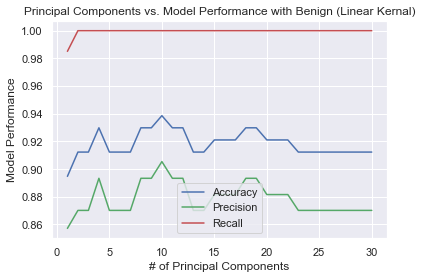

In [ ]:
# Linear Kernel: Benign Performance
plt.plot(k, Accuracy, 'b', label="Accuracy")
plt.plot(k, Precision_B, 'g', label="Precision")
plt.plot(k, Recall_B, 'r', label="Recall")
plt.xlabel("# of Principal Components")
plt.ylabel("Model Performance")
plt.title("Principal Components vs. Model Performance with Benign (Linear Kernal)")
plt.legend()
plt.show()

# Linear Kernel: Malignant Performance
plt.plot(k, Accuracy, 'b', label="Accuracy")
plt.plot(k, Precision_M, 'g', label="Precision")
plt.plot(k, Recall_M, 'r', label="Recall")
plt.xlabel("# of Principal Components")
plt.ylabel("Model Performance")
plt.title("Principal Components vs. Model Performance with Malignant (Linear Kernal)")
plt.legend()
plt.show()

In [179]:
# Perform training with K number of prinicipal components (Poly Kernel)
Accuracy = []
Precision_B = []
Recall_B = []
Precision_M = []
Recall_M = []

k = range(1,len(features)+1)
for i in k:
    
    pca_final = PCA(n_components=i)
    # df_train_pca = pca_final.fit_transform(X_train)
    # df_test_pca = pca_final.transform(X_test)
    
    principalComponents = pca_final.fit_transform(x)
    principalDF = pd.DataFrame(data = principalComponents)
    X_train, X_test, Y_train, Y_test = train_test_split(principalDF, y, test_size=0.2, random_state = 0)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.fit_transform(X_test)
    
    svc = SVC(kernel='poly', C=0.1, degree = 15)
    model_SVC = svc.fit(X_train, Y_train.ravel())
    Y_pred = model_SVC.predict(X_test)
    #Accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
    #Precision.append(metrics.precision_score(Y_test, Y_pred))
    #Recall.append(metrics.recall_score(Y_test, Y_pred))
    classReport = classification_report(Y_test, Y_pred, output_dict=True)
    classData = pd.DataFrame(classReport)
    Accuracy.append(classData.values[0,2])
    Precision_B.append(classData.values[0,0])
    Precision_M.append(classData.values[0,1])
    Recall_B.append(classData.values[1,0])
    Recall_M.append(classData.values[1,1])
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.02      0.04        47
         1.0       0.59      1.00      0.74        67

    accuracy                           0.60       114
   macro avg       0.80      0.51      0.39       114
weighted avg       0.76      0.60      0.45       114

[[ 1 46]
 [ 0 67]]


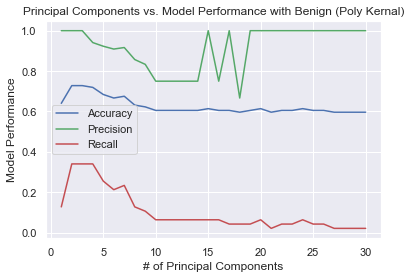

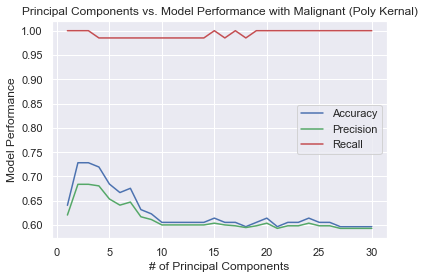

In [182]:
# Poly Kernel: Benign Performance
plt.plot(k, Accuracy, 'b', label="Accuracy")
plt.plot(k, Precision_B, 'g', label="Precision")
plt.plot(k, Recall_B, 'r', label="Recall")
plt.xlabel("# of Principal Components")
plt.ylabel("Model Performance")
plt.title("Principal Components vs. Model Performance with Benign (Poly Kernal)")
plt.legend()
plt.show()

# Poly Kernel: Malignant Performance
plt.plot(k, Accuracy, 'b', label="Accuracy")
plt.plot(k, Precision_M, 'g', label="Precision")
plt.plot(k, Recall_M, 'r', label="Recall")
plt.xlabel("# of Principal Components")
plt.ylabel("Model Performance")
plt.title("Principal Components vs. Model Performance with Malignant (Poly Kernal)")
plt.legend()
plt.show()

In [185]:
# Perform training with K number of prinicipal components (rbf kernel)
Accuracy = []
Precision_B = []
Recall_B = []
Precision_M = []
Recall_M = []

k = range(1,len(features)+1)
for i in k:
    
    pca_final = PCA(n_components=i)
    # df_train_pca = pca_final.fit_transform(X_train)
    # df_test_pca = pca_final.transform(X_test)
    
    principalComponents = pca_final.fit_transform(x)
    principalDF = pd.DataFrame(data = principalComponents)
    X_train, X_test, Y_train, Y_test = train_test_split(principalDF, y, test_size=0.2, random_state = 0)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.fit_transform(X_test)
    
    svc = SVC(kernel='rbf', C=10, gamma=0.01)
    model_SVC = svc.fit(X_train, Y_train.ravel())
    Y_pred = model_SVC.predict(X_test)
    #Accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
    #Precision.append(metrics.precision_score(Y_test, Y_pred))
    #Recall.append(metrics.recall_score(Y_test, Y_pred))
    classReport = classification_report(Y_test, Y_pred, output_dict=True)
    classData = pd.DataFrame(classReport)
    Accuracy.append(classData.values[0,2])
    Precision_B.append(classData.values[0,0])
    Precision_M.append(classData.values[0,1])
    Recall_B.append(classData.values[1,0])
    Recall_M.append(classData.values[1,1])
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        47
         1.0       0.96      1.00      0.98        67

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[44  3]
 [ 0 67]]


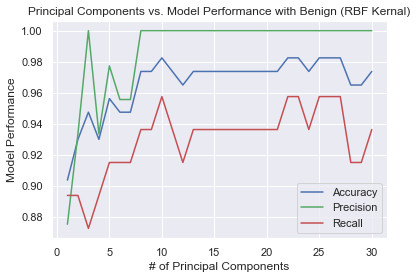

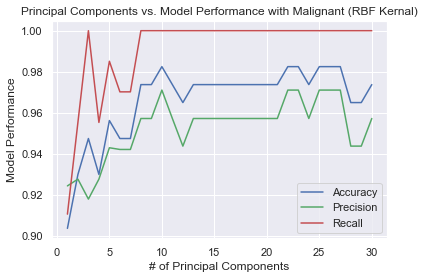

In [186]:
# RBF Kernel: Benign Performance
plt.plot(k, Accuracy, 'b', label="Accuracy")
plt.plot(k, Precision_B, 'g', label="Precision")
plt.plot(k, Recall_B, 'r', label="Recall")
plt.xlabel("# of Principal Components")
plt.ylabel("Model Performance")
plt.title("Principal Components vs. Model Performance with Benign (RBF Kernal)")
plt.legend()
plt.show()

# RBF Kernel: Malignant Performance
plt.plot(k, Accuracy, 'b', label="Accuracy")
plt.plot(k, Precision_M, 'g', label="Precision")
plt.plot(k, Recall_M, 'r', label="Recall")
plt.xlabel("# of Principal Components")
plt.ylabel("Model Performance")
plt.title("Principal Components vs. Model Performance with Malignant (RBF Kernal)")
plt.legend()
plt.show()